# 0. Loading the data

In [1]:
#Pkg.add("JLD")

#### (i) Load the data

In [2]:
using JLD

In [3]:
input_training_data = load("training_digits.jld")

Dict{String,Any} with 1 entry:
  "TRAIN_DIGITS" => [-1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.…

In [4]:
training = input_training_data["TRAIN_DIGITS"]; #256×319×10 Array{Float64,3}
training[:,:,1]

256×319 Array{Float64,2}:
 -1.0    -1.0    -1.0    -1.0    …  -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -0.567
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -0.064
 -0.454  -0.877  -0.99    0.1    …  -1.0  -0.689  -1.0    -1.0   0.979
  0.879   0.233   0.019   0.452     -1.0   0.421  -1.0    -1.0  -0.009
 -0.745   1.0     0.64   -0.665     -1.0   1.0    -0.865  -1.0  -0.167
 -1.0     0.996  -0.553  -0.358     -1.0   1.0     0.748  -1.0  -0.999
 -1.0     0.116  -0.999  -0.209     -1.0  -0.401   0.57   -1.0  -1.0  
 -1.0    -0.896  -1.0    -0.974  …  -1.0  -1.0    -0.439  -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
  ⋮                              ⋱         ⋮       

In [5]:
input_test_data = load("test_digits.jld");

In [6]:
test = input_test_data["digits"];
#256x2007
test;

In [7]:
test_labels = input_test_data["labels"]; #1x2007

1×2007 Array{Float64,2}:
 9.0  6.0  3.0  6.0  6.0  0.0  0.0  0.0  …  0.0  4.0  3.0  9.0  4.0  0.0  1.0

In [8]:
training[:,1,1];

#### (ii) Visualize

In [9]:
using PyPlot
using Interact

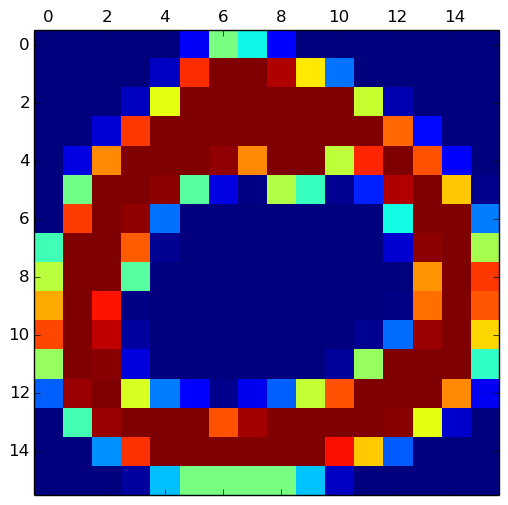

PyObject <matplotlib.image.AxesImage object at 0x7fe56b95b3d0>

In [10]:
PyPlot.matshow(reshape(training[:,17,1],(16,16))')

Interact.Slider{Int64}(Signal{Int64}(4, nactions=0),"digit",4,0:9,"d",true)

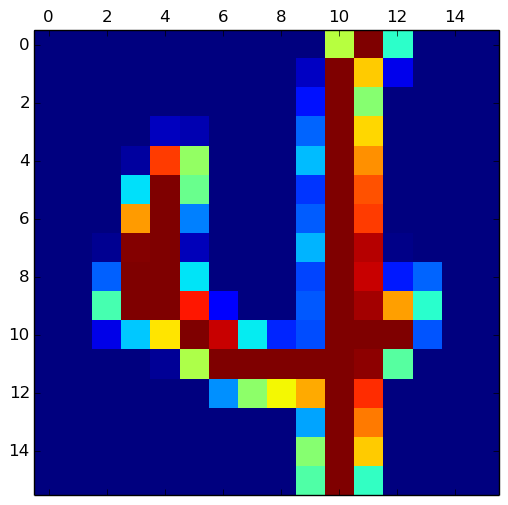

  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /opt/julia_packages/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /opt/julia_p

PyObject <matplotlib.image.AxesImage object at 0x7fe56b803450>

In [11]:
sample = 1
#f = figure()
@manipulate for digit = 0:9 #; withfig(f) do
    PyPlot.matshow(reshape(training[:,sample,digit+1],(16,16))')
#end
end

Note: Manipulate doesn't seem to be working properly with matshow, but I can still inspect things manually.

# Least Squares

#### (ii) Express "being a 7"

In [12]:
sev_answers = vcat(zeros(319*7),ones(319),zeros(319*2));

In [13]:
training_1D = reshape(training,(256,3190))

256×3190 Array{Float64,2}:
 -1.0    -1.0    -1.0    -1.0    -1.0    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.454  -0.877  -0.99    0.1    -1.0    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.879   0.233   0.019   0.452  -0.32      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.745   1.0     0.64   -0.665   0.731     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0     0.996  -0.553  -0.358  -0.657     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0     0.116  -0.999  -0.209  -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -0.896  -1.0    -0.974  -1.0    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0    -1.0    -1.0    -1.0    -1.0

In [14]:
training[:,3,1]'

1×256 Array{Float64,2}:
 -1.0  -1.0  -1.0  -1.0  -1.0  -0.99  0.019  …  -1.0  -1.0  -1.0  -1.0  -1.0

In [15]:
training_1D[:,3]'

1×256 Array{Float64,2}:
 -1.0  -1.0  -1.0  -1.0  -1.0  -0.99  0.019  …  -1.0  -1.0  -1.0  -1.0  -1.0

In [16]:
x7 = training_1D' \ sev_answers

256-element Array{Float64,1}:
  0.162239  
 -0.0856475 
 -0.0421587 
  0.0101445 
  0.0296692 
 -0.00363666
 -0.00852597
 -0.0211134 
 -0.0223367 
 -0.00922868
  0.020456  
  0.040617  
  0.0955706 
  ⋮         
 -0.0331259 
  0.0521252 
  0.0256102 
  0.0102834 
  0.00764212
 -0.0378097 
  0.0248904 
 -0.00770292
 -0.0388886 
 -0.0799864 
 -0.0473638 
 -0.0687386 

In [17]:
@manipulate for i=1:2007
    dot(test[:,i], x7)
end

Interact.Slider{Int64}(Signal{Int64}(1004, nactions=0),"i",1004,1:2007,"d",true)

-0.005969886548407688

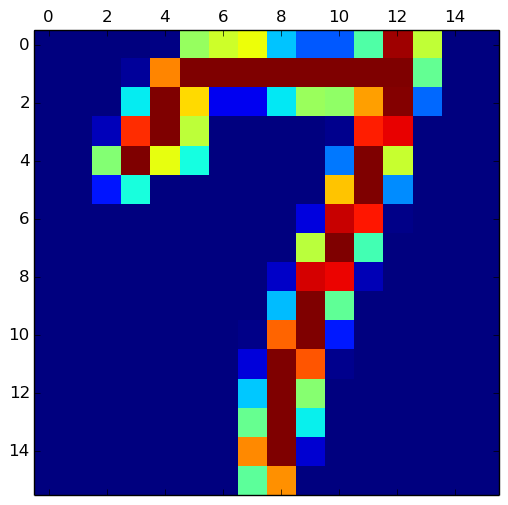

In [18]:
matshow(reshape(test[:,83],(16,16))');

#### (iv) Stacking up all such problems

In [19]:
numsamples = 319 #319;
YY=vcat(zeros(numsamples*0),ones(numsamples),zeros(numsamples*9))
for i = 1:9
    YY = hcat(YY,vcat(zeros(numsamples*i),ones(numsamples),zeros(numsamples*(9-i))))
end
YY
XX = copy(training_1D);
XX = XX'

3190×256 Array{Float64,2}:
 -1.0  -1.0  -1.0  -1.0    -1.0    …  -0.811  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.847  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    …  -0.96   -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -0.924     -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.955  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0        0.999   0.382  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.89   -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -0.871   0.068  …  -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.917  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
  ⋮                                ⋱              

In [20]:
#Determine which members of the training data are all zeros
zero_entries = []
for i = 3190:-1:1
    if XX[i,:] == zeros(256)
        push!(zero_entries,i)
    end
end
zero_entries

1483-element Array{Any,1}:
 3190
 3189
 3188
 3187
 3186
 3185
 3184
 3183
 3182
 3181
 3180
 3179
 3178
    ⋮
  583
  582
  581
  580
  579
  578
  577
  576
  575
  574
  573
  572

In [21]:
XX

3190×256 Array{Float64,2}:
 -1.0  -1.0  -1.0  -1.0    -1.0    …  -0.811  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.847  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    …  -0.96   -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -0.924     -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.955  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0        0.999   0.382  -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.89   -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -0.871   0.068  …  -1.0    -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -0.917  -1.0    -1.0  -1.0  -1.0
 -1.0  -1.0  -1.0  -1.0    -1.0       -1.0    -1.0    -1.0  -1.0  -1.0
  ⋮                                ⋱              

In [22]:
#Remove all-zero entries from training_1D and from YY.
#for i = length(zero_entries):-1:1
for i = 1:length(zero_entries) #zero_entries stored in reverse order
    XX = vcat(XX[1:(i-1),:], XX[(i+1):end,:])
    YY = vcat(YY[1:(i-1),:], YY[(i+1):end,:])
end

In [23]:
A = [1 2 3; 4 5 6; 7 8 9]; B = [7 8 9; 10 11 12; 13 14 15];
vcat(A[1:1,:],B[2:end,:])

3×3 Array{Int64,2}:
  1   2   3
 10  11  12
 13  14  15

In [24]:
WW = XX \ YY;

In [25]:
ww2 = XX \ YY[:,2];
println(ww2 == WW[:,2])
WW

true


256×10 Array{Float64,2}:
 -0.519032     0.201533     -0.104485    …  -0.0743279   -0.399001  
  0.255726    -0.171819      0.031394        0.117192     0.203183  
  1.31822e-5   0.0871387    -0.0393882      -0.0480679    0.0304209 
 -0.012522     0.0038362    -0.050506        0.117476    -0.0140615 
  0.056677     0.0215356     0.00877128     -0.0498723   -0.00568821
 -0.0210265   -0.00102296    0.00912283  …   0.0161524   -0.019885  
  0.0632169    0.000855167  -0.0102673      -0.0131922    0.0342114 
  0.0408204    0.0616645     8.2455e-5      -0.0074851   -0.0141807 
  0.00162832  -0.0258569     0.028436       -0.0323274    0.0673733 
  0.011972    -0.00351675   -0.00918591      0.031677     0.0562154 
 -0.0249261    0.00737614   -0.00839644  …  -0.0537811    0.0110667 
 -0.00340146  -0.00926461    0.00508918      0.020496    -0.0667375 
  0.022217    -0.0181451    -0.016763        0.0580511   -0.0702055 
  ⋮                                      ⋱                          
  0.01953

In [26]:
classify_matrix = WW' * test

10×2007 Array{Float64,2}:
 -0.209155   -0.103861   -0.221536   …   0.473275     1.03617    -0.038239 
  0.0051572  -0.16655    -0.0400515      0.00405677  -0.216809    0.867434 
  0.0292021   0.512647    0.104863      -0.0130656    0.242435    0.0239658
  0.0533071  -0.293925    0.843453      -0.144665    -0.267062    0.0361588
  0.273587    0.0877789  -0.116821       0.555422     0.426435    0.175815 
 -0.176682    0.425333   -0.0632337  …  -0.407072    -0.249619   -0.048476 
 -0.135704    0.62241    -0.128811      -0.0224774    0.0754765   0.0402243
 -0.0129469   0.394743    0.268951      -0.0155035    0.0757238  -0.109392 
  0.434346   -0.424179    0.309733       0.22531      0.0233109  -0.107065 
  0.729719   -0.0915753   0.0304398      0.339734    -0.0860626   0.15047  

In [27]:
classification = [(indmax(classify_matrix[:,i])-1) for i = 1:2007]

2007-element Array{Int64,1}:
 9
 6
 3
 2
 6
 0
 0
 0
 6
 9
 6
 2
 3
 ⋮
 0
 9
 7
 8
 2
 0
 9
 3
 9
 4
 0
 1

In [28]:
num_same = 0
for i = 1:2007
    if classification[i] == test_labels[i]
        num_same += 1
    end
end
print("Proportion classified correctly: ")
println(num_same / 2007.0)

Proportion classified correctly: 0.8011958146487295


So least squares classifies just over 80% of the test digits correctly. Strangely, whe I run the exact same code under kernel 0.4.7, it classifies just over 84% of the test digits correctly, but in kernel 0.5 it classifies 80% correctly. The same is true of part (v) below.

#### (v) The same with $\mathsf{W} \mathbf{x} + \mathbf{b} = \mathbf{y}_i$,

In [29]:
XX2 = hcat(XX, ones(length(XX[:,1])));
WW2 = XX2 \ YY;
XX2

1707×257 Array{Float64,2}:
 -1.0  -1.0  -1.0  -1.0    -1.0    -0.877  …  -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0     0.1       -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -0.991     -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -1.0       -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -1.0       -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -0.539  …  -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -1.0       -0.59  -0.959  -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -1.0       -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -1.0    -0.998     -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -0.765  -0.46   -0.14      -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0   0.068   1.0     0.219  …  -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -0.957  -0.943     -1.0   -1.0    -1.0  -1.0  1.0
 -1.0  -1.0  -1.0  -1.0    -0.577  -0.033     -1.

In [30]:
test2 = vcat(test,ones(2007)')

257×2007 Array{Float64,2}:
 -1.0    -1.0  -1.0    -1.0  -1.0    …  -1.0    -1.0    -1.0    -1.0  
 -1.0    -1.0  -1.0    -1.0  -1.0       -1.0    -1.0    -1.0    -1.0  
 -1.0    -1.0  -1.0    -1.0  -1.0       -1.0    -1.0    -1.0    -1.0  
 -1.0    -1.0  -0.593  -1.0  -1.0       -1.0    -1.0    -1.0    -1.0  
 -1.0    -1.0   0.7    -1.0  -1.0       -1.0    -0.031  -0.534  -1.0  
 -0.948  -1.0   1.0    -1.0  -1.0    …  -1.0     0.752   0.578  -1.0  
 -0.561  -1.0   1.0    -1.0  -1.0       -0.855  -0.431   1.0    -1.0  
  0.148  -1.0   1.0    -1.0  -0.858      0.209  -1.0     0.301   0.399
  0.384  -1.0   1.0    -1.0  -0.106      0.941  -1.0    -0.328   0.949
  0.904  -1.0   0.853  -1.0   0.802      0.809  -1.0    -0.939  -0.399
  0.29   -1.0   0.075  -1.0  -0.21   …   0.02   -1.0    -1.0    -1.0  
 -0.782  -1.0  -0.925  -1.0  -1.0       -1.0    -1.0    -1.0    -1.0  
 -1.0    -1.0  -1.0    -1.0  -1.0       -1.0    -1.0    -1.0    -1.0  
  ⋮                                  ⋱            

In [31]:
classify_matrix2 = WW2' * test2;

In [32]:
classification2 = [(indmax(classify_matrix2[:,i])-1) for i = 1:2007];

In [33]:
misclassifiedImages = zeros(256)
misclassifiedIndices = []
num_same = 0
for i = 1:2007
    if classification2[i] == test_labels[i]
        num_same += 1
    else
        misclassifiedImages = hcat(misclassifiedImages, test[:,i])
        push!(misclassifiedIndices,i)
    end
end
misclassifiedImages = misclassifiedImages[:,2:end]
print("Proportion classified correctly with Wx+b: ")
println(num_same / 2007.0)

Proportion classified correctly with Wx+b: 0.8011958146487295


In [34]:
#misclassifiedImages; misclassifiedIndices; test[:,4]


This affine regression seems to classify the same proportion correctly, just over 80%. I don't see an obvious reason why this should be the case, which makes me a bit suspicious.

#### (vi) The features of misclassified images

Interact.Slider{Int64}(Signal{Int64}(200, nactions=0),"sample",200,1:399,"d",true)

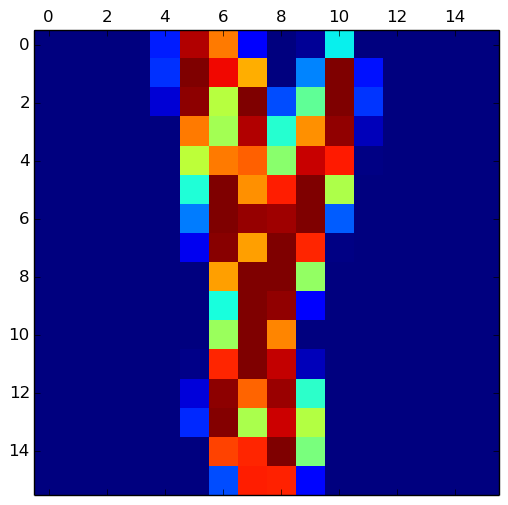

Should be 8.0 but classified as 1



PyObject <matplotlib.image.AxesImage object at 0x7fe569332790>

In [35]:
#f = figure()
@manipulate for sample = 1:length(misclassifiedIndices) #; withfig(f) do
    print("Should be ")
    print(test_labels[misclassifiedIndices[sample]])
    print(" but classified as ")
    print(classification2[misclassifiedIndices[sample]])
    println()
    println()
    PyPlot.matshow(reshape(misclassifiedImages[:,sample],(16,16))')
#    end
end

In [36]:
length(misclassifiedIndices)

399

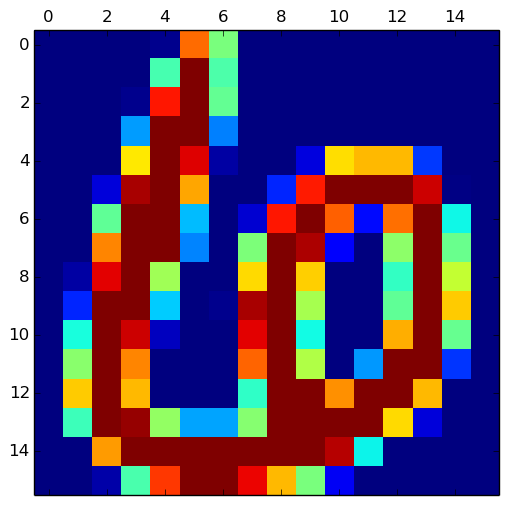

Should be 6.0 but classified as 4



PyObject <matplotlib.image.AxesImage object at 0x7fe5693a8850>

In [37]:
sample = 17  #between 1 and 311
print("Should be ")
print(test_labels[misclassifiedIndices[sample]])
print(" but classified as ")
print(classification2[misclassifiedIndices[sample]])
println()
println()
matshow(reshape(misclassifiedImages[:,sample],(16,16))')

Many of the misclassified samples are deformed or much less clear than the correctly classified samples. A handful are even tricky for a human to determine the correct digit. Generally, the misclassified samples fall into one of a few categories. Some have missing or extra lines. Most are rotated, skewed, distorted or off-center, so that lines aren't where the classifier expects them to be. For a few there isn't a clear reason why it was misclassified.

# 2. SVD

#### (vii) Getting a feel for SVD

In [38]:
#Pkg.add("Images")
#Pkg.add("ImageCore")

In [39]:
using Images, Colors, ImageCore, ImageMagick

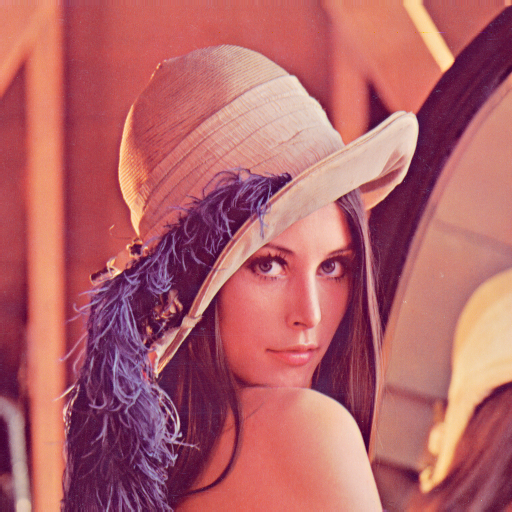

In [40]:
img = load("Lenna.png")

In [41]:
channels = float(Array(channelview(img)))
svdc = [svd(channels[1,:,:]), svd(channels[2,:,:]), svd(channels[3,:,:])]
svdc[1][3]

512×512 Array{Float64,2}:
 -0.0495084  -0.0400523   0.0139879    …   0.0          -0.894427   
 -0.0495084  -0.0400523   0.0139879        0.00195776    0.223607   
 -0.0495084  -0.0400523   0.0139879        0.00158579    0.223607   
 -0.0495084  -0.0400523   0.0139879       -0.00461863    0.223607   
 -0.0495084  -0.0400523   0.0139879        0.00107507    0.223607   
 -0.0494767  -0.0410898   0.0123903    …   6.95789e-15   5.04374e-13
 -0.0493857  -0.0424927   0.00994246      -7.45733e-15  -4.15668e-13
 -0.0493579  -0.0431394   0.00823183       9.62366e-15   5.11605e-13
 -0.0493183  -0.04313     0.00607401      -9.3352e-15   -5.78565e-13
 -0.0492272  -0.0436162   0.00384967       2.93221e-15   2.357e-13  
 -0.0492494  -0.0448272   0.00321416   …   9.32224e-16  -3.48888e-14
 -0.0492027  -0.0461288   0.00190008      -2.99016e-15  -2.51424e-13
 -0.0491923  -0.0465035   0.000894627      5.23871e-15   3.44128e-13
  ⋮                                    ⋱   ⋮                        
 -0.0417

In [42]:
function rankkapprox(decomp, k)
    A = zeros(length(decomp[1][:,1]),length(decomp[3][:,1]))
    for i = 1:k
        A += (decomp[1][:,i] * decomp[2][i] * (decomp[3][:,i]'))
    end
    return A
end

rankkapprox (generic function with 1 method)

In [43]:
#colorview(RGB,channels)

In [44]:
rrank = 3

3

In [45]:
function copychannelinto(ind, source, dest)
    for i = 1:512
        for j = 1:512
            dest[ind,i,j] = source[i,j]
        end
    end
end

copychannelinto (generic function with 1 method)

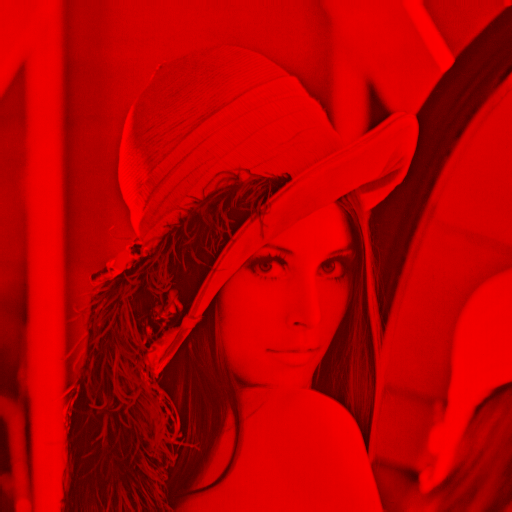

In [46]:
toplot = Array{Float64}(3,512,512)
copychannelinto(1,channels[1,:,:]', toplot)
copychannelinto(2,zeros(512,512), toplot)
copychannelinto(3,zeros(512,512), toplot)
colorview(RGB, toplot)

In [47]:
#toplot = Array{Float64}(3,512,512)
#copychannelinto(1,rankkapprox(svdc[1],512)', toplot)
#copychannelinto(2,channels[2,:,:]', toplot)
#copychannelinto(3,channels[3,:,:]', toplot)
#colorview(RGB, toplot)
svdc[1][3][:,1]

512-element Array{Float64,1}:
 -0.0495084
 -0.0495084
 -0.0495084
 -0.0495084
 -0.0495084
 -0.0494767
 -0.0493857
 -0.0493579
 -0.0493183
 -0.0492272
 -0.0492494
 -0.0492027
 -0.0491923
  ⋮        
 -0.0417763
 -0.0419222
 -0.0420593
 -0.04234  
 -0.0425388
 -0.0426921
 -0.0428261
 -0.0428142
 -0.0428813
 -0.0428812
 -0.0429167
 -0.0429167

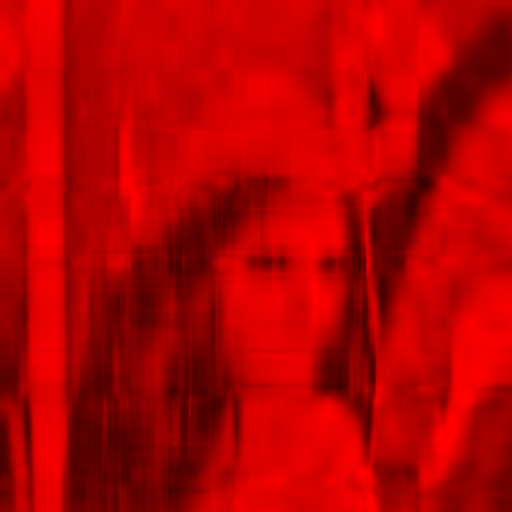

In [48]:
toplot = Array{Float64}(3,512,512)
copychannelinto(1,rankkapprox(svdc[1],10)', toplot)
copychannelinto(2,zeros(512,512), toplot)
copychannelinto(3,zeros(512,512), toplot)
colorview(RGB, toplot)

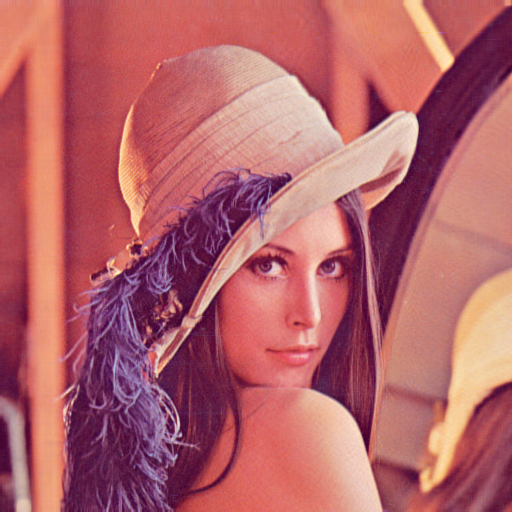

In [49]:
toplot = Array{Float64}(3,512,512)
c_rank = 120
copychannelinto(1,rankkapprox(svdc[1],c_rank)', toplot)
copychannelinto(2,rankkapprox(svdc[2],c_rank)', toplot)
copychannelinto(3,rankkapprox(svdc[3],c_rank)', toplot)
colorview(RGB, toplot)

Interact.Slider{Int64}(Signal{Int64}(256, nactions=0),"red_rank",256,1:512,"d",true)

Interact.Slider{Int64}(Signal{Int64}(256, nactions=0),"green_rank",256,1:512,"d",true)

Interact.Slider{Int64}(Signal{Int64}(256, nactions=0),"blue_rank",256,1:512,"d",true)

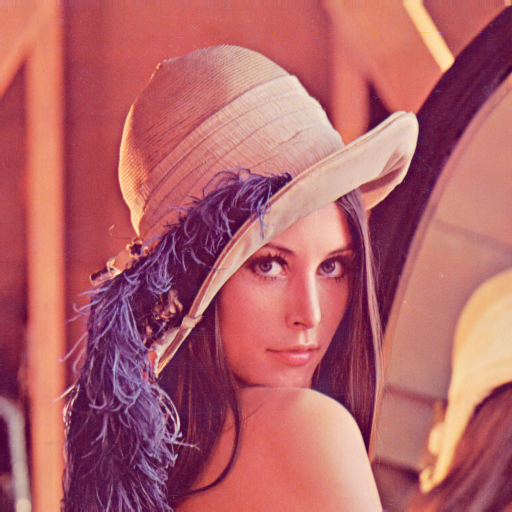

In [50]:
toplot = Array{Float64}(3,512,512)
@manipulate for red_rank=1:512,green_rank=1:512,blue_rank=1:512
    copychannelinto(1,rankkapprox(svdc[1],red_rank)', toplot)
    copychannelinto(2,rankkapprox(svdc[2],green_rank)', toplot)
    copychannelinto(3,rankkapprox(svdc[3],blue_rank)', toplot)
    colorview(RGB, toplot)
end

Some idea of the overall image can already be obtained at quite low ranks, e.g. rank 9, which is extremely blurry but already shows features emerging such as the face and the hat. By rank 18 it still looks pixelated but is starting to resolve, and you can even read the expression on the face. By rank 30 you can see pretty much the whole image, although it still doesn't look smooth. By rank 60 the image very much resembles the original, although there is some loss of texture. This becomes more subtle as the rank grows, e.g. rank 100 looks pretty smooth but can still be distinguished easily from the original side-by-side. By rank 120 it becomes very hard to distinguish from the original.

#### (viii) Classifying digits using SVD

In [51]:
training[:,:,1]

256×319 Array{Float64,2}:
 -1.0    -1.0    -1.0    -1.0    …  -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -0.567
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -0.064
 -0.454  -0.877  -0.99    0.1    …  -1.0  -0.689  -1.0    -1.0   0.979
  0.879   0.233   0.019   0.452     -1.0   0.421  -1.0    -1.0  -0.009
 -0.745   1.0     0.64   -0.665     -1.0   1.0    -0.865  -1.0  -0.167
 -1.0     0.996  -0.553  -0.358     -1.0   1.0     0.748  -1.0  -0.999
 -1.0     0.116  -0.999  -0.209     -1.0  -0.401   0.57   -1.0  -1.0  
 -1.0    -0.896  -1.0    -0.974  …  -1.0  -1.0    -0.439  -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
 -1.0    -1.0    -1.0    -1.0       -1.0  -1.0    -1.0    -1.0  -1.0  
  ⋮                              ⋱         ⋮       

In [99]:
k=15
dists = zeros(2007)
for i in 1:10
    svd_dig = svd(training[:,:,i])
    UK = svd_dig[1][:,1:k]
    projcoeffs = UK'*test
    next_dists = [norm((test - svd_dig[1][:,1:k] * projcoeffs)[:,ind]) for ind=1:2007]
    dists = hcat(dists,next_dists)
end
dists = dists[:,2:end]

2007×10 Array{Float64,2}:
  9.97535  11.0803    10.4275    8.75902  …   7.25354   8.99526   4.01859
  9.03932  11.8778     9.78469  11.1903      11.7017   11.2755   11.3185 
  9.47556  12.6168     9.49808   4.42379     10.4835    8.06001  10.4037 
  8.27885  11.583      9.94968  10.4574      11.5804   11.2279   11.3218 
  9.22165  11.5618    10.6426   12.0307      11.7297   11.6766   12.4601 
  3.84937  11.6954     9.84119  10.2401   …  11.7088   11.015    12.5386 
  3.75064  11.8835     7.77546   8.88672      9.86542   9.17613   9.72161
  3.98899  11.8255     9.26386   8.75443     11.2786    8.74631  11.0835 
  8.56539  12.054     10.4921   11.0953      11.5123    9.43396  11.7515 
  8.85298   9.20012    8.35607   8.17406      6.24355   7.63175   3.77044
  8.9345   10.9332    10.3565   10.1716   …  11.4385    9.8391   11.0211 
 10.719    11.3044     5.37883  10.4522      11.1235   11.1702   12.0724 
  7.87338  10.9713     7.78538   7.38296     11.866    11.0601   12.0222 
  ⋮         

In [100]:
#k=3
#UK = svd1[1][:,1:k]
#projcoeffs = UK'*test
#svd1[1][:,1:k] * projcoeffs
#[norm((test - svd1[1][:,1:k] * projcoeffs)[:,ind]) for ind=1:2007]

In [101]:
svd_class = [(indmin(dists[i,:])-1) for i = 1:2007];

In [102]:
num_same = 0
for i = 1:2007
    if svd_class[i] == test_labels[1,i]
        num_same += 1
    end
end
print("Proportion classified correctly: ")
println(num_same / 2007.0)

Proportion classified correctly: 0.9412057797708022


In [103]:
svd_class' - test_labels

1×2007 Array{Float64,2}:
 0.0  0.0  0.0  -6.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

With k=15 we correctly classify over 94% of images. This is substantially better than the performance of the least squares approach above.

For k too small, the smaller space is not expressive enough to capture the structure of a number. For k too large, we are overfitting to the training data, considering too large a space and projecting onto images that don't resemble the digit. 

# 3. Stochastic gradient descent

#### (ix) Show the gradient

Let $e_i$ denote the $i$th basis vector. Consider the $(i,j)$th component $\partial f / \partial w_{ij}$.
This is given by
\begin{align*}
\frac{partial f}{\partial w_{ij}}
&= \left(\frac{partial}{\partial w_{ij}} (Wx-y)^T\right) (Wx-y)
+ (Wx-y)^T\frac{partial}{\partial w_{ij}} (Wx-y)\\
&= (x_j e_i)^T (Wx-y) + (Wx-y)^T (e_i x_j)\\
&= 2 (x_j e_i)^T (Wx-y).
\end{align*}

On the other hand, the $(i,j)$th component of
$2(Wx-y)x^T$ is given by
$$2x_j \cdot (Wx-y)_i
= 2(e_i x_j)^T (Wx-y) $$
so we can see that these expressions are equal.

Consequently we have that 
$$\nabla_W f = 2(Wx-y)x^T$$
as desired.

#### (x) Use this to do stochastic gradient descent

In [180]:
η = 0.001
propcorr = []
WWW = rand(256,10);
for i = 1:1000
    for j = 1:1000
        ind = rand(1:length(YY[:,1]))
        WWW = WWW - η * 2 * XX[ind,:] * (XX[ind,:]' * WWW - YY[ind,:]')
    end
    classify_matrix3 = WWW' * test;
    classification3 = [(indmax(classify_matrix3[:,i])-1) for i = 1:2007]
    num_same = 0
    for i = 1:2007
        if classification3[i] == test_labels[i]
            num_same += 1
        end
    end
    push!(propcorr,num_same / 2007.0);
end
#WWW = η * 2 *  (XX[ind:ind,:] * WWW)

In [181]:
propcorr

1000-element Array{Any,1}:
 0.200797
 0.307424
 0.241654
 0.282511
 0.318884
 0.344793
 0.390135
 0.442451
 0.40857 
 0.371201
 0.428999
 0.466368
 0.42003 
 ⋮       
 0.787245
 0.796213
 0.798705
 0.786248
 0.789238
 0.787245
 0.782262
 0.793722
 0.795715
 0.782262
 0.788739
 0.790234

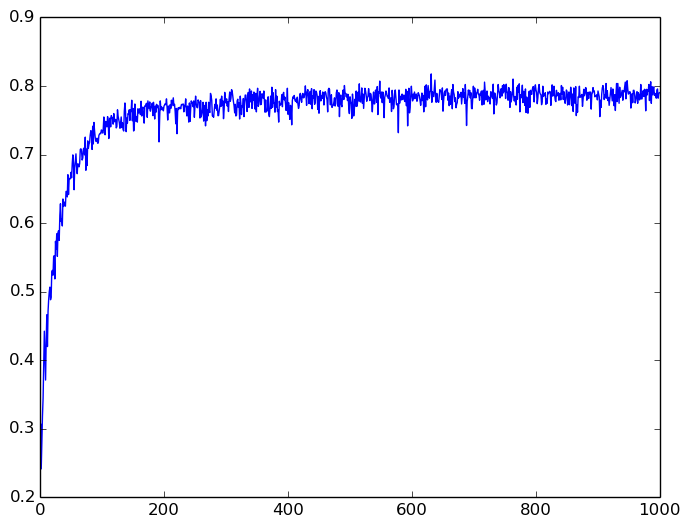

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe5a8effa50>

In [182]:
plot(propcorr)

In [201]:
propcorr[800]

0.8016940707523668

We can see that it takes on the order of 100*1000 = 100,000 steps to achieve accuracy only a bit below the optimal solution. After 100,000 steps the accuracy is 74%, and after 1,000,000 it has improved to 79%, only slightly below the 80% achieved by the optimal solution. (Actually, in an execution I just ran, the accuracy reaches roughly 80% in some earlier iterations, e.g. after 800,000 steps, but then drops slightly again due to the stochastic nature of the algorithm.) With this many iterations, the classification performs comparably (only slightly worse) to the classification of section 1.